NOTE: This notebook uses a JSON dictionary created by the `ndlar_flow/scripts/low_level_data_ana/charge_data_feature_studies/whole_tile_triggering/Whole_Tile_Trigger_Event_Dictionary_Builder.py` script. As this notebook comprises of preliminary/diagnostic studies, the code may not be fully optimized. The code will be optimized in terms of runtime and organization as time permits. Please contact Elise Hinkle (ehinkle@uchicago.edu) with any questions, comments, or concerns. Also, all JSON dictionary file locations are likely outdated and should be changed based on where the user has chosen to store the relevant dictionary(ies).

In [1]:
# Import relevant libraries/packages
import matplotlib as mlp
import matplotlib.pyplot as plt
import numpy as np
import h5py
import argparse
from datetime import datetime
import glob
import json
import cmasher as cmr
import math
import matplotlib as mpl
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib.gridspec import GridSpec
import sys
import os
import sys
sys.path.append('/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/')
from lar2x2_evd import *
from collections import Counter

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Hello


In [3]:
# Open dictionary with WTT events
events_data_file = '/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/full_tile_trigger_dict_V5.json'
events_data_open = open(events_data_file)
events_data_dict = json.load(events_data_open)

# Only look at events with true WTT events (create relevant dictionaries for beam and non-beam events)
beam_full_tile_spike_dict = {k: v for k, v in events_data_dict.items() if any(v['event_full_tile_spike']) and v['is_beam']}
non_beam_full_tile_spike_dict = {k: v for k, v in events_data_dict.items() if any(v['event_full_tile_spike']) and not v['is_beam']}
print('Number of beam events with full tile spike: ', len(beam_full_tile_spike_dict))
print('Number of non-beam events with full tile spike: ', len(non_beam_full_tile_spike_dict))

Number of beam events with full tile spike:  115
Number of non-beam events with full tile spike:  159


In [4]:
# Create PDF of event displays of beam events with WTT (first half) to hand scan/check sample
output_pdf_name = '/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/beam_tile_spike_events_first_half.pdf'
with PdfPages(output_pdf_name, keep_empty=False) as output:
    counter = 0
    for keys, values in beam_full_tile_spike_dict.items():
        counter += 1
        if counter>55: continue
        if counter%5 == 0: print('--------------- LOOKING AT EVENT NUMBER: ', counter, '---------------')
        file = values['filepath'].split('/')[-1]
        directory = values['filepath'].split('packet')[0]
        ev_id = values['event_id']

        evd = LArEventDisplay(filedir=directory, filename=file, nhits_min=2000, ntrigs=0, show_light=False, show_colorbars=True, beam_only=True)
        hits_ini, cmap_ini, charge_norm_ini = evd.display_event(ev_id)
        output.savefig(bbox_inches='tight')
        plt.close()

Number of available events: 36
For fast-forwarding purposes, here is every 10th event number in your sample: [1436, 3754, 6179]
Number of external triggers in this event: 1
Event 1436 is a beam trigger event
Number of available events: 41
For fast-forwarding purposes, here is every 10th event number in your sample: [1525, 2446, 3429, 4073]
Number of external triggers in this event: 1
Event 2669 is a beam trigger event
Number of available events: 41
For fast-forwarding purposes, here is every 10th event number in your sample: [1525, 2446, 3429, 4073]
Number of external triggers in this event: 1
Event 3893 is a beam trigger event
Number of available events: 39
For fast-forwarding purposes, here is every 10th event number in your sample: [10578, 20757, 25827]
Number of external triggers in this event: 1
Event 28656 is a beam trigger event
--------------- LOOKING AT EVENT NUMBER:  5 ---------------
Number of available events: 49
For fast-forwarding purposes, here is every 10th event number

In [5]:
# Create PDF of event displays of beam events with WTT (second half) to hand scan/check sample
output_pdf_name = '/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/beam_tile_spike_events_second_half.pdf'
with PdfPages(output_pdf_name, keep_empty=False) as output:
    counter = 0
    for keys, values in beam_full_tile_spike_dict.items():
        counter += 1
        if counter<=55: continue
        if counter%5 == 0: print('--------------- LOOKING AT EVENT NUMBER: ', counter, '---------------')
        file = values['filepath'].split('/')[-1]
        directory = values['filepath'].split('packet')[0]
        ev_id = values['event_id']

        evd = LArEventDisplay(filedir=directory, filename=file, nhits_min=2000, ntrigs=0, show_light=False, show_colorbars=True, beam_only=True)
        hits_ini, cmap_ini, charge_norm_ini = evd.display_event(ev_id)
        output.savefig(bbox_inches='tight')
        plt.close()

Number of available events: 39
For fast-forwarding purposes, here is every 10th event number in your sample: [1644, 2467, 3551]
Number of external triggers in this event: 1
Event 4024 is a beam trigger event
Number of available events: 32
For fast-forwarding purposes, here is every 10th event number in your sample: [1310, 2415, 3549]
Number of external triggers in this event: 1
Event 649 is a beam trigger event
Number of available events: 38
For fast-forwarding purposes, here is every 10th event number in your sample: [657, 1510, 2790]
Number of external triggers in this event: 1
Event 3196 is a beam trigger event
Number of available events: 51
For fast-forwarding purposes, here is every 10th event number in your sample: [769, 1482, 2154, 2903, 4045]
Number of external triggers in this event: 1
Event 142 is a beam trigger event
--------------- LOOKING AT EVENT NUMBER:  60 ---------------
Number of available events: 45
For fast-forwarding purposes, here is every 10th event number in you

In [8]:
# Create PDF of event displays of non-beam events with WTT (first third) to hand scan/check sample
output_pdf_name = '/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/non_beam_full_tile_spike_events_first_third.pdf'
with PdfPages(output_pdf_name, keep_empty=False) as output:
    counter = 0
    for keys, values in non_beam_full_tile_spike_dict.items():
        counter += 1
        if counter>53: continue
        if counter%5 == 0: print('--------------- LOOKING AT EVENT NUMBER: ', counter, '---------------')
        file = values['filepath'].split('/')[-1]
        directory = values['filepath'].split('packet')[0]
        ev_id = values['event_id']

        evd = LArEventDisplay(filedir=directory, filename=file, nhits_min=2000, ntrigs=0, show_light=False, show_colorbars=True, beam_only=False)
        hits_ini, cmap_ini, charge_norm_ini = evd.display_event(ev_id)
        output.savefig(bbox_inches='tight')
        plt.close()

Number of available events: 56
For fast-forwarding purposes, here is every 10th event number in your sample: [1198, 2469, 3960, 4785, 6000]
Number of external triggers in this event: 1
Event 1775 is NOT a beam trigger event
Number of available events: 61
For fast-forwarding purposes, here is every 10th event number in your sample: [681, 2118, 4588, 5852, 7266, 8736]
Number of external triggers in this event: 1
Event 7266 is NOT a beam trigger event
Number of available events: 47
For fast-forwarding purposes, here is every 10th event number in your sample: [784, 1822, 2763, 3746]
Number of external triggers in this event: 1
Event 3746 is NOT a beam trigger event
Number of available events: 48
For fast-forwarding purposes, here is every 10th event number in your sample: [10007, 18326, 22875, 26483]
Number of external triggers in this event: 1
Event 13279 is NOT a beam trigger event
--------------- LOOKING AT EVENT NUMBER:  5 ---------------
Number of available events: 51
For fast-forward

Number of available events: 52
For fast-forwarding purposes, here is every 10th event number in your sample: [15528, 25632, 33427, 38739, 47831]
Number of external triggers in this event: 1
Event 15528 is NOT a beam trigger event
--------------- LOOKING AT EVENT NUMBER:  55 ---------------
Number of available events: 53
For fast-forwarding purposes, here is every 10th event number in your sample: [17410, 32656, 39107, 50771, 60709]
Number of external triggers in this event: 1
Event 63435 is NOT a beam trigger event
Number of available events: 686
For fast-forwarding purposes, here is every 10th event number in your sample: [449, 1035, 1103, 1177, 1655, 2121, 2633, 2711, 5821, 9912, 19374, 19669, 29933, 38941, 54455, 57399, 67973, 72270, 90799, 101339, 103965, 107246, 120337, 122470, 123929, 124076, 125476, 126951, 138940, 142428, 146671, 161105, 163502, 166062, 166503, 166548, 166585, 166643, 166681, 166735, 166781, 166810, 166856, 166894, 166922, 166957, 166991, 167041, 167079, 167150

IndexError: index 0 is out of bounds for axis 0 with size 0

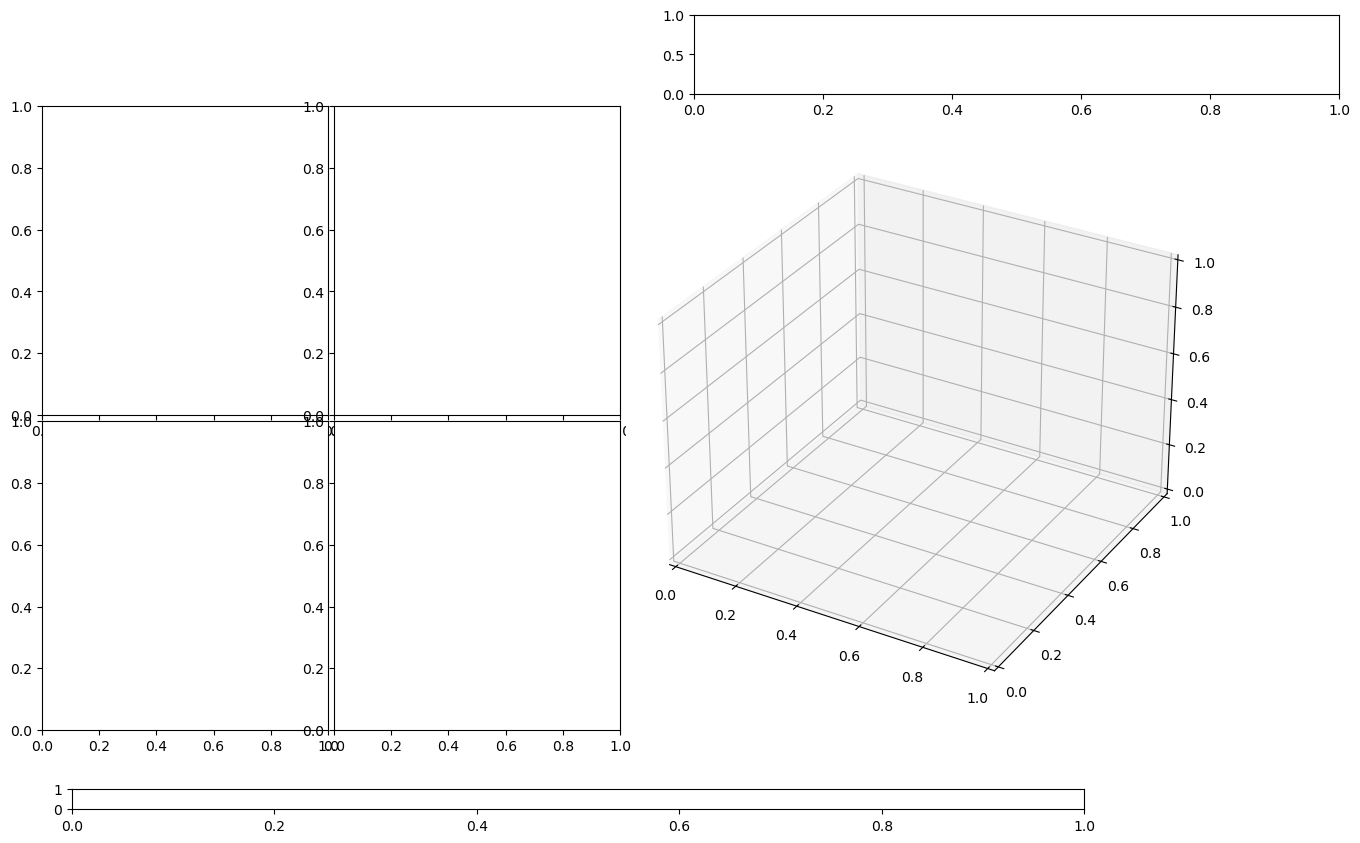

In [9]:
# Create PDF of event displays of non-beam events with WTT (second third) to hand scan/check sample
output_pdf_name = '/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/non_beam_full_tile_spike_events_second_third.pdf'
with PdfPages(output_pdf_name, keep_empty=False) as output:
    counter = 0
    for keys, values in non_beam_full_tile_spike_dict.items():
        counter += 1
        if counter<=53: continue
        if counter>106: continue
        if counter%5 == 0: print('--------------- LOOKING AT EVENT NUMBER: ', counter, '---------------')
        file = values['filepath'].split('/')[-1]
        directory = values['filepath'].split('packet')[0]
        ev_id = values['event_id']

        evd = LArEventDisplay(filedir=directory, filename=file, nhits_min=2000, ntrigs=0, show_light=False, show_colorbars=True, beam_only=False)
        hits_ini, cmap_ini, charge_norm_ini = evd.display_event(ev_id)
        output.savefig(bbox_inches='tight')
        plt.close()

Number of available events: 53
For fast-forwarding purposes, here is every 10th event number in your sample: [740, 1836, 2556, 3208, 3902]
Number of external triggers in this event: 0
Event 436 is NOT a beam trigger event
Number of available events: 42
For fast-forwarding purposes, here is every 10th event number in your sample: [790, 1878, 2979, 3808]
Number of external triggers in this event: 1
Event 3544 is NOT a beam trigger event
Number of available events: 52
For fast-forwarding purposes, here is every 10th event number in your sample: [685, 1437, 1991, 2840, 3764]
Number of external triggers in this event: 1
Event 1936 is NOT a beam trigger event
--------------- LOOKING AT EVENT NUMBER:  105 ---------------
Number of available events: 53
For fast-forwarding purposes, here is every 10th event number in your sample: [1193, 2047, 2540, 3581, 4326]
Number of external triggers in this event: 1
Event 889 is NOT a beam trigger event
Number of available events: 30
For fast-forwarding pu

IndexError: index 0 is out of bounds for axis 0 with size 0

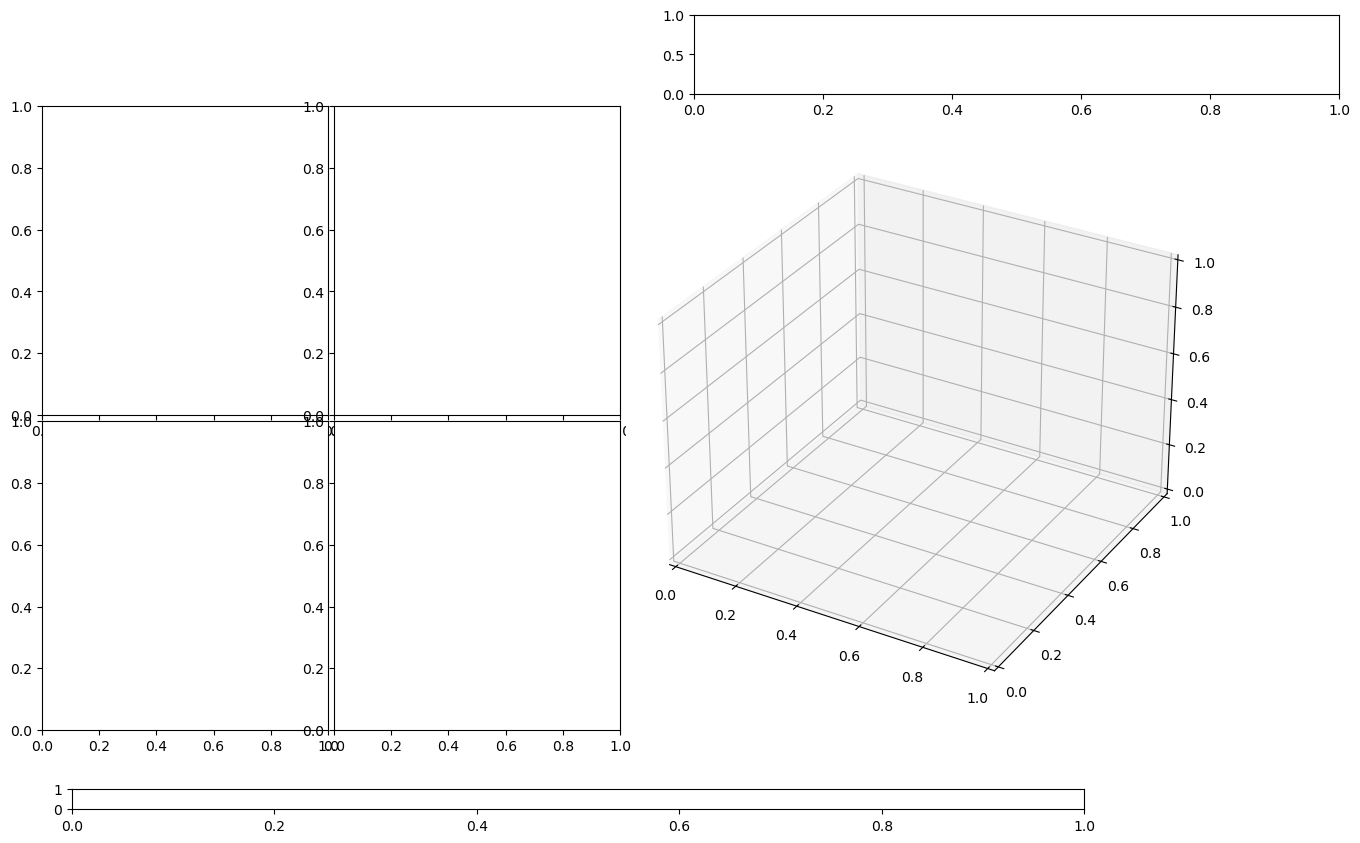

In [10]:
# Create PDF of event displays of non-beam events with WTT (third third) to hand scan/check sample
output_pdf_name = '/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/non_beam_full_tile_spike_events_third_third.pdf'
with PdfPages(output_pdf_name, keep_empty=False) as output:
    counter = 0
    for keys, values in non_beam_full_tile_spike_dict.items():
        counter += 1
        if counter<=101: continue
        if counter%5 == 0: print('--------------- LOOKING AT EVENT NUMBER: ', counter, '---------------')
        file = values['filepath'].split('/')[-1]
        directory = values['filepath'].split('packet')[0]
        ev_id = values['event_id']

        evd = LArEventDisplay(filedir=directory, filename=file, nhits_min=2000, ntrigs=0, show_light=False, show_colorbars=True, beam_only=False)
        hits_ini, cmap_ini, charge_norm_ini = evd.display_event(ev_id)
        output.savefig(bbox_inches='tight')
        plt.close()

--------------- LOOKING AT EVENT NUMBER:  155 ---------------
packet-0050028-2024_07_12_11_48_05_CDT.FLOW.hdf5
Number of available events: 10
For fast-forwarding purposes, here is every 10th event number in your sample: [2085]


IndexError: index 0 is out of bounds for axis 0 with size 0

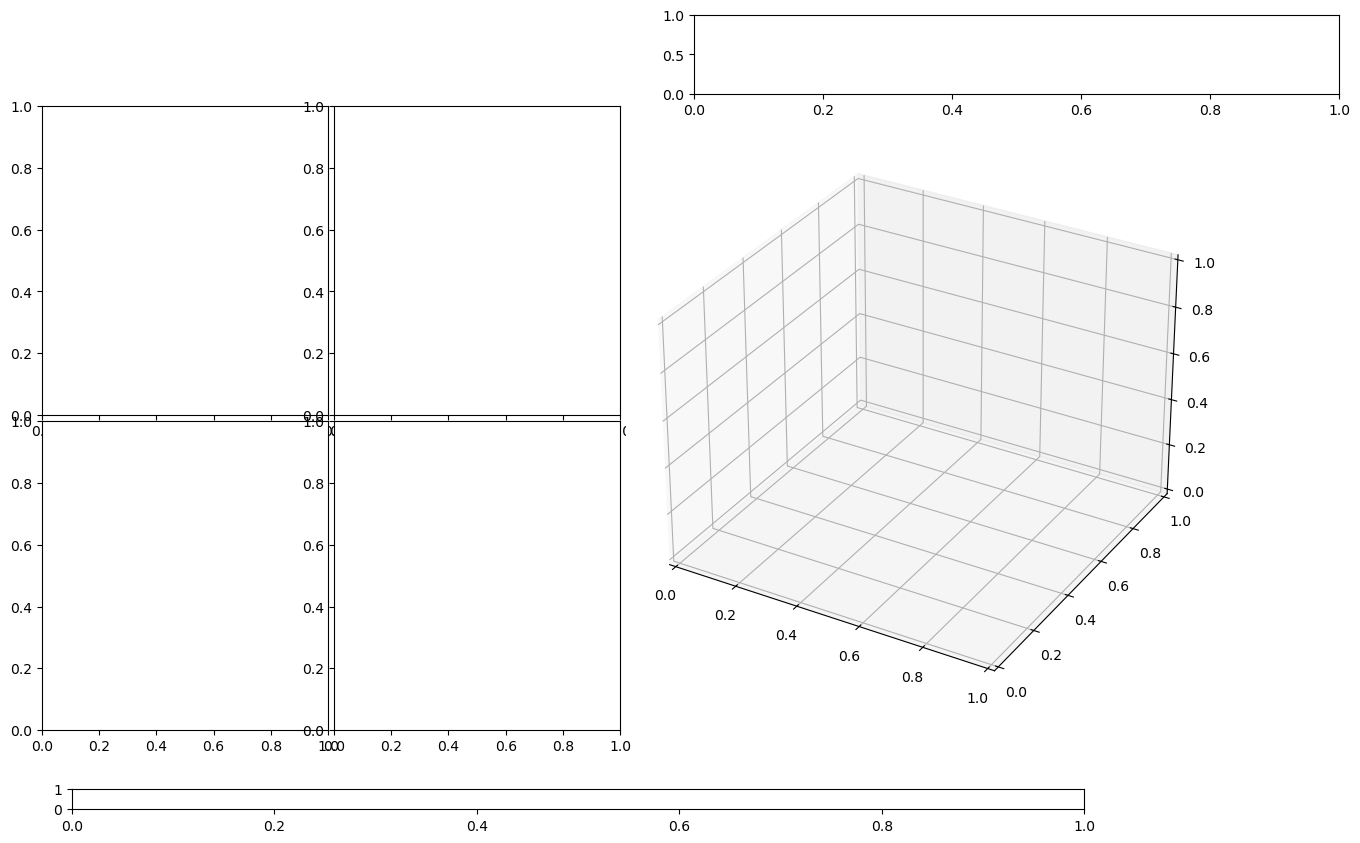

In [18]:
# Create PDF of event displays of non-beam events with WTT to hand scan/check sample (final events not caught in previous PDFs due to certain events not 
# showing up in the event display due to an event display bug only allowing data with assigned global run and subrun values. This bug has been fixed as of 2024-10-07)
output_pdf_name = '/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/non_beam_full_tile_spike_events_fourth_third.pdf'
with PdfPages(output_pdf_name, keep_empty=False) as output:
    counter = 0
    for keys, values in non_beam_full_tile_spike_dict.items():
        counter += 1
        if counter<=154: continue
        if counter%5 == 0: print('--------------- LOOKING AT EVENT NUMBER: ', counter, '---------------')
        file = values['filepath'].split('/')[-1]
        print(file)
        directory = values['filepath'].split('packet')[0]
        ev_id = values['event_id']

        evd = LArEventDisplay(filedir=directory, filename=file, nhits_min=2000, ntrigs=0, show_light=False, show_colorbars=True, beam_only=False)
        hits_ini, cmap_ini, charge_norm_ini = evd.display_event(ev_id)
        output.savefig(bbox_inches='tight')
        plt.close()

In [20]:
# Make dictionaries of events without "true WTT" tag in dictionary
beam_NOT_full_tile_spike_dict = {k: v for k, v in events_data_dict.items() if not any(v['event_full_tile_spike']) and v['is_beam']}
non_beam_NOT_full_tile_spike_dict = {k: v for k, v in events_data_dict.items() if not any(v['event_full_tile_spike']) and not v['is_beam']}
print('Number of beam events without full tile spike: ', len(beam_NOT_full_tile_spike_dict))
print('Number of non-beam events without full tile spike: ', len(non_beam_NOT_full_tile_spike_dict))

Number of beam events without full tile spike:  110
Number of non-beam events without full tile spike:  301


In [21]:
# Create PDF of event displays of beam events tagged as not having WTT (first half) to hand scan/check sample
output_pdf_name = '/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/beam_NOT_tile_spike_events_first_half.pdf'
with PdfPages(output_pdf_name, keep_empty=False) as output:
    counter = 0
    for keys, values in beam_NOT_full_tile_spike_dict.items():
        counter += 1
        if counter>55: continue
        if counter%5 == 0: print('--------------- LOOKING AT EVENT NUMBER: ', counter, '---------------')
        file = values['filepath'].split('/')[-1]
        directory = values['filepath'].split('packet')[0]
        ev_id = values['event_id']

        evd = LArEventDisplay(filedir=directory, filename=file, nhits_min=2000, ntrigs=0, show_light=False, show_colorbars=True, beam_only=True)
        hits_ini, cmap_ini, charge_norm_ini = evd.display_event(ev_id)
        output.savefig(bbox_inches='tight')
        plt.close()

Number of available events: 15
For fast-forwarding purposes, here is every 10th event number in your sample: [2938]
Number of external triggers in this event: 1
Event 3584 is a beam trigger event
Number of available events: 51
For fast-forwarding purposes, here is every 10th event number in your sample: [1827, 3196, 4765, 5345, 6721]
Number of external triggers in this event: 1
Event 5072 is a beam trigger event
Number of available events: 44
For fast-forwarding purposes, here is every 10th event number in your sample: [2523, 5163, 6137, 7871]
Number of external triggers in this event: 1
Event 5589 is a beam trigger event
Number of available events: 27
For fast-forwarding purposes, here is every 10th event number in your sample: [1068, 2243]
Number of external triggers in this event: 1
Event 408 is a beam trigger event
--------------- LOOKING AT EVENT NUMBER:  5 ---------------
Number of available events: 50
For fast-forwarding purposes, here is every 10th event number in your sample: 

In [22]:
# Create PDF of event displays of beam events tagged as not having WTT (second half) to hand scan/check sample
output_pdf_name = '/global/cfs/cdirs/dune/users/ehinkle/nd_prototypes_ana/2x2_sim/run-ndlar-flow/ndlar_flow/event_display/LAr_evd/beam_NOT_tile_spike_events_second_half.pdf'
with PdfPages(output_pdf_name, keep_empty=False) as output:
    counter = 0
    for keys, values in beam_NOT_full_tile_spike_dict.items():
        counter += 1
        if counter<=55: continue
        if counter%5 == 0: print('--------------- LOOKING AT EVENT NUMBER: ', counter, '---------------')
        file = values['filepath'].split('/')[-1]
        directory = values['filepath'].split('packet')[0]
        ev_id = values['event_id']

        evd = LArEventDisplay(filedir=directory, filename=file, nhits_min=2000, ntrigs=0, show_light=False, show_colorbars=True, beam_only=True)
        hits_ini, cmap_ini, charge_norm_ini = evd.display_event(ev_id)
        output.savefig(bbox_inches='tight')
        plt.close()

Number of available events: 38
For fast-forwarding purposes, here is every 10th event number in your sample: [905, 2007, 3383]
Number of external triggers in this event: 1
Event 2903 is a beam trigger event
Number of available events: 38
For fast-forwarding purposes, here is every 10th event number in your sample: [905, 2007, 3383]
Number of external triggers in this event: 1
Event 3448 is a beam trigger event
Number of available events: 41
For fast-forwarding purposes, here is every 10th event number in your sample: [952, 2003, 2978, 4058]
Number of external triggers in this event: 1
Event 3977 is a beam trigger event
Number of available events: 28
For fast-forwarding purposes, here is every 10th event number in your sample: [948, 3134]
Number of external triggers in this event: 1
Event 2930 is a beam trigger event
--------------- LOOKING AT EVENT NUMBER:  60 ---------------
Number of available events: 42
For fast-forwarding purposes, here is every 10th event number in your sample: [1

IOG:  1
[13 14 15]
[4 5 6 8]
Tile IDs:  [4 8]
Tile Counts:  [9886 6892]
IOCH IDs:  [13 14 15 23 29 31 32]
IOCH Counts:  [1190 6028 2668  817 2033 3309 1550]
IOG:  2
Tile IDs:  [7]
Tile Counts:  [1750]
IOCH IDs:  [25 26 27 29]
IOCH Counts:  [178 796 776 140]


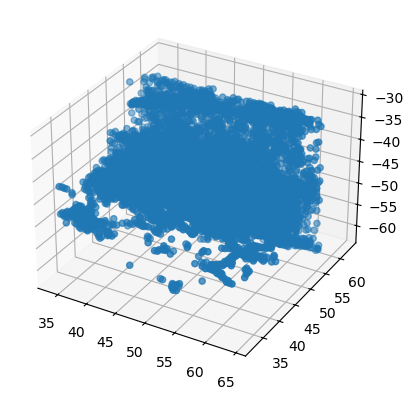

In [32]:
# This cell was used to look at the data for a specific event to check the hardware/software tile ID mapping. Confusion over the mapping
# occurred due to not understanding that the tile IDs in software were switched for certain tiles in certain modules, likely due to wiring
# discrepancies somewhere. Correct mappings were confirmed by the 2x2 charge readout team; I was just unaware of this at the time of this cell's creation.
def io_channel_to_tile(io_channel):
    return int(np.floor((io_channel-1-((io_channel-1)%4))/4+1))

file = '/global/cfs/cdirs/dune/www/data/2x2/nearline/flowed_charge/REFLOW/v5/beam/july8_2024/nominal_hv/packet-0050017-2024_07_09_13_35_59_CDT.FLOW.hdf5'
f = h5py.File(file,'r')
ev_id = 7315
events = f['charge/events/data']
hits_full = f['charge/calib_prompt_hits/data']
hits_ref = f['charge/events/ref/charge/calib_prompt_hits/ref']
hits_region = f['charge/events/ref/charge/calib_prompt_hits/ref_region']
packets_full = f['charge/packets/data']
packets_ref = f['charge/calib_prompt_hits/ref/charge/packets/ref']
packets_region = f['charge/calib_prompt_hits/ref/charge/packets/ref_region']
event_mask = events['id'] == ev_id
event = events[event_mask]
hit_ref = hits_ref[hits_region[ev_id,'start']:hits_region[ev_id,'stop']]
hit_ref = np.sort(hit_ref[hit_ref[:,0] == ev_id, 1])
hits = hits_full[hit_ref]
packet_ref = packets_ref[hit_ref]
packet_ref = np.sort(packet_ref[:, 1])
packets = packets_full[packet_ref]
io_groups, iog_counts = np.unique(packets['io_group'], return_counts=True)
iog_count_over_threshold = iog_counts > 1000
for iog in io_groups[iog_count_over_threshold]:
    print("IOG: ", iog)
    iog_mask = packets['io_group'] == iog
    single_iog_packets = packets[iog_mask]
    single_iog_packets_tile_id = [io_channel_to_tile(io_channel) for io_channel in single_iog_packets['io_channel']]
    if iog == 1:
        tile_mask = single_iog_packets_tile_id == 4
        #print(single_iog_packets_tile_id)
        #print(np.unique(single_iog_packets['chip_id'][np.where(np.array(single_iog_packets_tile_id) == 4)]))
        #print(np.unique(single_iog_packets['channel_id'][np.where(np.array(single_iog_packets_tile_id) == 4)]))
        print(np.unique(single_iog_packets['io_channel'][np.where(np.array(single_iog_packets_tile_id) == 4)]))
        #print(np.unique(single_iog_packets['dataword'][np.where(np.array(single_iog_packets_tile_id) == 4)]))
        iog_mask_hits = hits['io_group'] == iog
        single_iog_hits = hits[iog_mask_hits]
        single_iog_hits_tile_id = [io_channel_to_tile(io_channel) for io_channel in single_iog_hits['io_channel']]
        print(np.unique(single_iog_hits_tile_id))
        single_tile_hits_mask = np.where(np.array(single_iog_hits_tile_id) == 4)
        #print(single_tile_hits_mask)
        single_tile_hits = single_iog_hits[single_tile_hits_mask]
        fig = plt.figure()
        ax = fig.add_subplot(projection='3d')
        ax.scatter(single_tile_hits['z'], single_tile_hits['x'], single_tile_hits['y'])
    tile_ids, tile_counts = np.unique(single_iog_packets_tile_id, return_counts=True)
    ioch_ids, ioch_counts = np.unique(single_iog_packets['io_channel'], return_counts=True)
    num_packets_mask_ioch = ioch_counts > 100
    num_packets_mask_tiles = tile_counts > 1000
    print("Tile IDs: ", tile_ids[num_packets_mask_tiles])
    print("Tile Counts: ", tile_counts[num_packets_mask_tiles])
    print("IOCH IDs: ", ioch_ids[num_packets_mask_ioch])
    print("IOCH Counts: ", ioch_counts[num_packets_mask_ioch])

Text(0.5, 1.0, 'Event 7281-2024-07-09 02:34:07- IO Group 4- Tile 8')

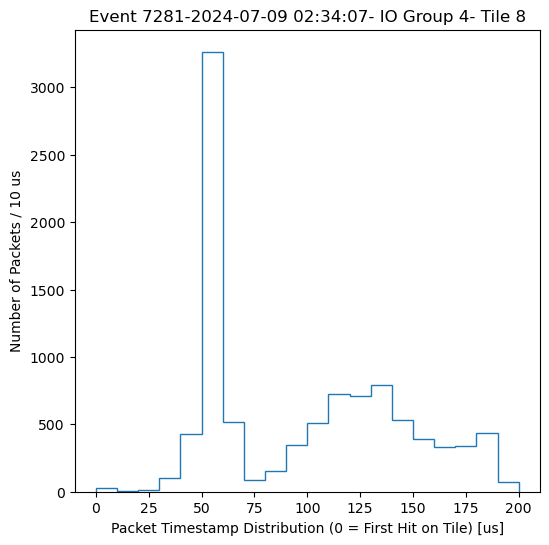

In [5]:
# This cell was used to look at an example of the timing distribution of packets received on a tile experiencing WTT. 
iog = 4 
tile = 8

def io_channel_to_tile(io_channel):
    return int(np.floor((io_channel-1-((io_channel-1)%4))/4+1))

file = '/global/cfs/cdirs/dune/www/data/2x2/nearline/flowed_charge/REFLOW/v5/beam/july8_2024/nominal_hv/packet-0050017-2024_07_08_21_24_16_CDT.FLOW.hdf5'
f = h5py.File(file,'r')
ev_id = 7281
events = f['charge/events/data']
hits_full = f['charge/calib_prompt_hits/data']
hits_ref = f['charge/events/ref/charge/calib_prompt_hits/ref']
hits_region = f['charge/events/ref/charge/calib_prompt_hits/ref_region']
packets_full = f['charge/packets/data']
packets_ref = f['charge/calib_prompt_hits/ref/charge/packets/ref']
packets_region = f['charge/calib_prompt_hits/ref/charge/packets/ref_region']
event_mask = events['id'] == ev_id
event = events[event_mask]
hit_ref = hits_ref[hits_region[ev_id,'start']:hits_region[ev_id,'stop']]
hit_ref = np.sort(hit_ref[hit_ref[:,0] == ev_id, 1])
hits = hits_full[hit_ref]
packet_ref = packets_ref[hit_ref]
packet_ref = np.sort(packet_ref[:, 1])
packets = packets_full[packet_ref]
iog_mask = packets['io_group'] == iog
single_iog_packets = packets[iog_mask]
single_iog_packets_tile_id = np.array([io_channel_to_tile(io_channel) for io_channel in single_iog_packets['io_channel']])
tile_mask = single_iog_packets_tile_id == tile
single_tile_packets = single_iog_packets[tile_mask]
event_datetime = datetime.utcfromtimestamp(event['unix_ts'][0]).strftime('%Y-%m-%d %H:%M:%S')
single_tile_timestamps = (single_tile_packets['timestamp'] - min(single_tile_packets['timestamp']))/10
max_timestamp = math.ceil(max(single_tile_timestamps)/100)*100
timestamp_bins = np.linspace(0, max_timestamp, int(max_timestamp/10+1))
fig2 = plt.figure(figsize=(6,6))
ax2 = []
ax2.append(fig2.add_subplot(1,1,1))
ax2[0].hist(single_tile_timestamps, bins=timestamp_bins, histtype='step', linewidth=1)
ax2[0].set_xlabel("Packet Timestamp Distribution (0 = First Hit on Tile) [us]")
ax2[0].set_ylabel("Number of Packets / 10 us")
ax2[0].set_title("Event "+str(ev_id)+'-'+event_datetime+'- IO Group '+str(iog)+'- Tile '+str(tile))